### Import statements

In [597]:
import sys
from Data import Data, createMetadataIfNone
from TransportData import TransportData
import matplotlib.pyplot as plt
import matplotlib
import numpy
import pandas
import scipy
import os
from matplotlib import gridspec
from matplotlib import cm

### Cooling curve - bluefors 20220909/databases/01_ISBT_0909_cooldown.db

In [ ]:
dat = TransportData()

In [191]:
dat_bulk = pandas.read_csv('/Users/jackbarlow/Dropbox/Jack B/data/ISBT/2_ISBTD1coolingdown_2.csv')

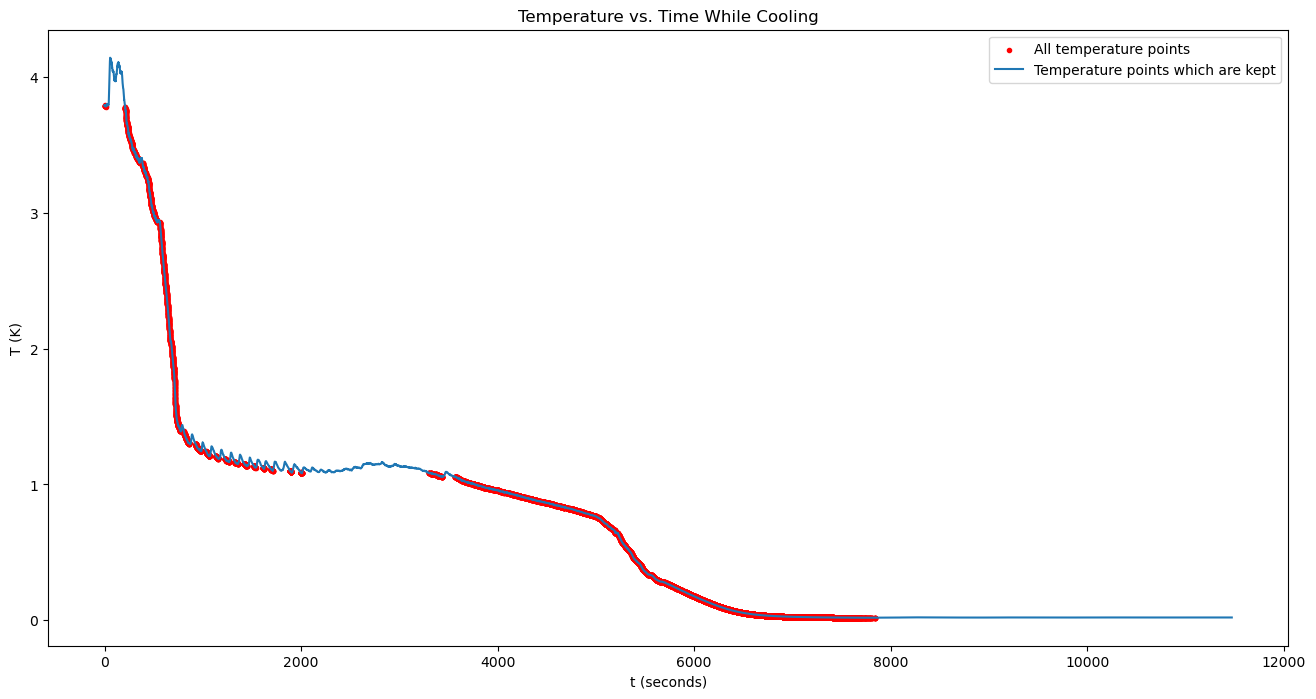

In [32]:
## Generate temperatures for which sample was actively cooling - remove hysteresis

less_than_all_prev = dat.data["results-5-1"]["lakeshore_372_ch09_temperature"] < dat.data["results-5-1"]["lakeshore_372_ch09_temperature"].cummin().shift().astype(float)
fig = plt.figure()
fig.set_size_inches(16, 8)
plt.scatter(dat.data["results-5-1"].where(less_than_all_prev).index, dat.data["results-5-1"]['lakeshore_372_ch09_temperature'].where(less_than_all_prev), 
            marker='.', color = 'r')
plt.plot(dat.data["results-5-1"].index, dat.data["results-5-1"]['lakeshore_372_ch09_temperature'])
plt.xlabel('t (seconds)')
plt.ylabel('T (K)')
plt.title('Temperature vs. Time While Cooling')
plt.legend({"Temperature points which are kept", "All temperature points"})
plt.show()

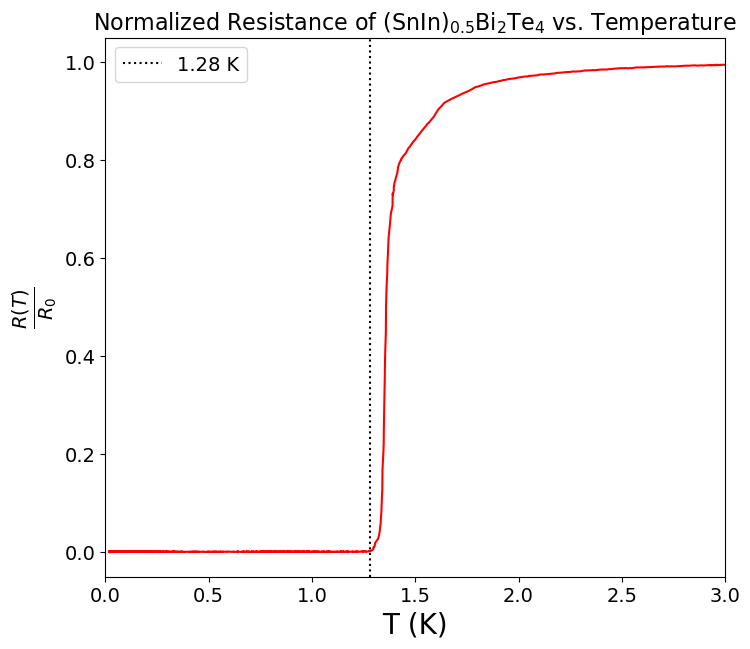

In [39]:
## Generate cooling curve for presentation

axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure()
fig.set_size_inches(8, 7)

# can look at gaps in data with this
'''
plt.scatter(dat.data["results-5-1"]["lakeshore_372_ch09_temperature"].where(less_than_all_prev).dropna(),
            dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).dropna() / dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).max(),
            color='r', marker='.')
'''
R0 = dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).max()

plt.plot(dat.data["results-5-1"]["lakeshore_372_ch09_temperature"].where(less_than_all_prev).dropna(),
         dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).dropna() / R0,
         color='r')

Tc = 1.28
plt.axvline(x=Tc, color='black', linestyle=':', label=f'{Tc} K')

plt.xlabel('T (K)', fontdict=axis_font_options)
plt.ylabel(r'$\frac{R(T)}{R_0}$', fontdict=axis_font_options)
plt.xlim([0, 3])
plt.title(r'Normalized Resistance of (SnIn)$_{0.5}$Bi$_{2}$Te$_{4}$ vs. Temperature', fontdict=title_font_options)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [40]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS Cooling Curve.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

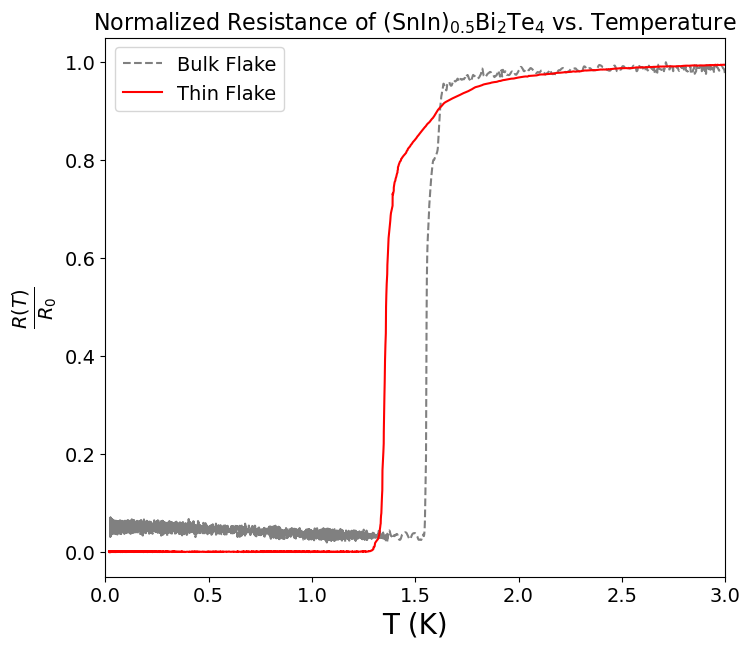

In [206]:
## Generate cooling curve for presentation

axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}

fig = plt.figure()
fig.set_size_inches(8, 7)

# can look at gaps in data with this
'''
plt.scatter(dat.data["results-5-1"]["lakeshore_372_ch09_temperature"].where(less_than_all_prev).dropna(),
            dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).dropna() / dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).max(),
            color='r', marker='.')
'''
R0 = dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).max()

plt.plot(dat_bulk['lakeshore_372_ch09_temperature'].where(dat_bulk['lakeshore_372_ch09_temperature'] < 3), 
         dat_bulk['Vxx2_X'].where(dat_bulk['lakeshore_372_ch09_temperature'] < 3) / dat_bulk['Vxx2_X'].where(dat_bulk['lakeshore_372_ch09_temperature'] < 3).max(),
         color='gray', linestyle='--', label='Bulk Flake')

plt.plot(dat.data["results-5-1"]["lakeshore_372_ch09_temperature"].where(less_than_all_prev).dropna(),
         dat.data["results-5-1"]["Vxx2_D1_X"].where(less_than_all_prev).dropna() / R0,
         color='r', label='Thin Flake')

# Tc = 1.28
# plt.axvline(x=Tc, color='black', linestyle=':', label=f'{Tc} K')

plt.xlabel('T (K)', fontdict=axis_font_options)
plt.ylabel(r'$\frac{R(T)}{R_0}$', fontdict=axis_font_options)
plt.xlim([0, 3])
plt.title(r'Normalized Resistance of (SnIn)$_{0.5}$Bi$_{2}$Te$_{4}$ vs. Temperature', fontdict=title_font_options)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [207]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS Cooling Curve Both Flakes.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

### Hc2 from fixed temperature OOP field sweeps - bluefors 20220909/databases/03_ISBT_0910_TdepFieldSweep.db

In [42]:
dat2 = TransportData()

In [64]:
# color scheme kinda sucks - should try to make it rainbow or something and use fewer curves

color1 = (0, 0.4470, 0.7410)
color2 = (0.8500, 0.3250, 0.0980)

axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}

fig = plt.figure(figsize=(8,7), dpi=1200)

num_samples = 20
i = 0
for key in dat2.data.keys():
    if 'results' in key and key != 'results-21-1':
        plt.plot(dat2.data[key]["Vxx2_D1_X"].index, dat2.data[key]["Vxx2_D1_X"] * dat2.metadata['AC resistor'],
                 label=dat2.data["experiments"]["sample_name"][i][0:6] + ' K', 
                 color=(color1[0] + i/num_samples*(color2[0] - color1[0]), 
                        color1[1] + i/num_samples*(color2[1] - color1[1]), 
                        color1[2] + i/num_samples*(color2[2] - color1[2]))
                    )
        i += 1

plt.xlim([0, 1.5])
plt.xlabel(r'μ$_0$H$_{\perp}$ (T)', fontdict=axis_font_options)
plt.ylabel(r'R ($\Omega$)', fontdict=axis_font_options)
plt.title('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

In [65]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS Perp Critical Field.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

Text(0, 0.5, 'μ$_0$H$_{c2}$ (T)')

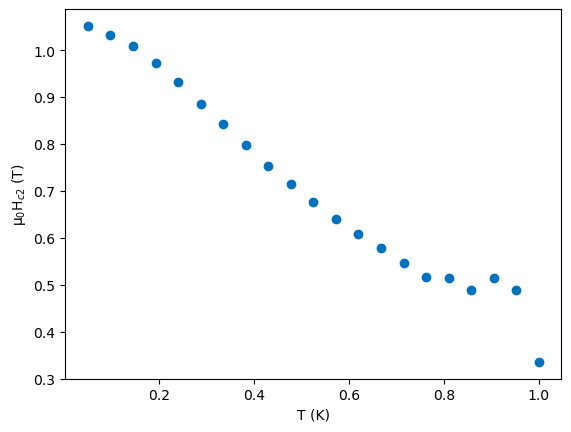

In [114]:
# don't think this really works backwards - 
# meant to pick out temperature at which it reaches half its normal resistance during field sweep

fields = []
for key in dat.data.keys():
    if 'results' in key:
        fields.append(abs(dat.data[key].index.where(abs(dat.data[key]["Vxx2_D1_X"] / R0 - 0.5) < 0.0011).dropna()[-1]))

temps = numpy.linspace(0.05, 1, num=21)

fig = plt.figure()
plt.scatter(temps, fields)
plt.xlabel(r'T (K)')
plt.ylabel(r'μ$_0$H$_{c2,\perp}$ (T)')
plt.show()

### In-plane critical field - /bluefors 20230106/databases/07_ISBT_20230106_0114_Tdep_CritField

In [159]:
dat3 = TransportData()

'/Users/jackbarlow/Dropbox/Jack B/data/ISBT/Stencil mask 10L & EBL 11L/bluefors 20230106/databases/07_ISBT_20230106_0114_Tdep_CritField.db'

In [67]:
metadata_dict = {'AC voltage' : 0.01,
                 'AC resistor' : 100e6,
                 'Pre-Amp Gain' : 1000,
                 'Filter Specs' : '3kHz LPF, AC Coupling, Low Noise, Low Impedance',
                 'Current Pre-Amp Sesnitivity' : 1e-5,
                 'Keithley Resistance' : 1e6}
createMetadataIfNone(metadata_dict)

In [156]:
magnet_sweeps = dat3.data['experiments']['exp_id'].where(dat3.data['experiments']['sample_name'].str.contains('sweep_field_up')).dropna().to_numpy().astype(int).astype(str)
magnet_sweeps = numpy.core.defchararray.add(numpy.core.defchararray.add('results-', magnet_sweeps), '-1')

axis_font_options = {'size' : 20}
title_font_options = {'size' : 16}

fig = plt.figure(figsize=(8,7), dpi=1200)

i = 0
color1 = (0, 0.4470, 0.7410)
color2 = (0.8500, 0.3250, 0.0980)
# num_samples = len(magnet_sweeps)
num_samples = 12

temps = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for key in magnet_sweeps[:11]:
    plt.plot(dat3.data[key]['Vxx_X'].index, 
             -dat3.data[key]['Vxx_X'] / dat3.data[key]['Isd_X'] * 100, 
             color = (color1[0] + i/num_samples*(color2[0] - color1[0]), 
                      color1[1] + i/num_samples*(color2[1] - color1[1]), 
                      color1[2] + i/num_samples*(color2[2] - color1[2])),
             label = 'T = ' + str(temps[i]) + ' K'
            )
    i += 1

plt.xlabel(r'μ$_0$H$_{\parallel}$ (T)', fontdict=axis_font_options)
plt.ylabel(r'R ($\Omega$)', fontdict=axis_font_options)
plt.xlim([0, 8])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show()

In [157]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS Parallel Critical Field.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

### Hall effect - ppms 20221012/databases/10_1013_FieldSweep_StepBias

In [179]:
dat4 = TransportData()

In [178]:
metadata_dict = {'Gain' : 1e3,
                 'Current Pre-amp Sensitivity' : 1e-5,
                 'Pre-amp Filter Settings' : '3kHz LPF 6dB/octave',
                 'AC Coupling' : 'On',
                 'AC Source Voltage' : 2,
                 'AC Source Resistor' : 1e6,
                 'Keithley Resistor' : 100e3}
createMetadataIfNone(metadata_dict)

In [272]:
dat4.data['results-78-1']

id  Isd_812_P  Vxx_2f_910_X  Vxx_1f_910_P  Vxy_2f_1013_Y  \
time                                                                     
0.375        7.5    176.922     -0.000002        -3.162      -0.000004   
0.578       21.5    176.922     -0.000002        -3.162      -0.000003   
0.781       35.5    176.922     -0.000002        -3.162      -0.000003   
0.984       49.5    176.922     -0.000002        -3.162      -0.000003   
1.187       63.5    176.922     -0.000002        -3.162      -0.000004   
...          ...        ...           ...           ...            ...   
454.000  30163.5    176.922     -0.000003        -3.162       0.000004   
454.219  30177.5    176.916     -0.000003        -3.162       0.000004   
454.422  30191.5    176.916     -0.000003        -3.162       0.000005   
454.625  30205.5    176.916     -0.000003        -3.162       0.000006   
454.828  30219.5    176.916     -0.000003        -3.162       0.000006   

         Vxy_1f_1013_X  Vxx_2f_910_P  dynacool_field_measured  \
time                                                            
0.375         0.207948        99.720                -4.500039   
0.578         0.207948       100.902                -4.500007   
0.781         0.207978       100.464                -4.499095   
0.984         0.208009       100.014                -4.496361   
1.187         0.207978       100.650                -4.490801   
...                ...           ...                      ...   
454.000       0.207063       103.380                 4.500027   
454.219       0.207063       103.326                 4.500028   
454.422       0.207063       104.076                 4.500026   
454.625       0.207093       104.496                 4.500029   
454.828       0.207063       102.972                 4.500026   

         dynacool_temperature  Vxy_1f_1013_P  Vxy_2f_1013_P  Vxy_2f_1013_X  \
time                                                                         
0.375                1.999887         -3.150     -74.822105   1.002590e-06   
0.578                1.999887         -3.144     -72.052872   1.079830e-06   
0.781                1.999887         -3.126     -70.890205   1.150167e-06   
0.984                2.001662         -3.138     -71.583954   1.188038e-06   
1.187                2.006705         -3.144     -72.965645   1.176756e-06   
...                       ...            ...            ...            ...   
454.000              1.993921         -3.132     103.873352  -9.474907e-07   
454.219              1.993921         -3.144     100.760193  -8.398848e-07   
454.422              1.993921         -3.144      95.611671  -4.827104e-07   
454.625              1.996863         -3.138      90.917412  -7.971668e-08   
454.828              1.997825         -3.144      87.746986   2.418151e-07   

         Isd_812_X  Vxx_1f_910_X  Vxx_2f_910_Y  
time                                            
0.375    -0.048844      0.611027      0.000012  
0.578    -0.048844      0.611027      0.000012  
0.781    -0.048844      0.611027      0.000012  
0.984    -0.048847      0.611027      0.000012  
1.187    -0.048847      0.611027      0.000013  
...            ...           ...           ...  
454.000  -0.048840      0.611027      0.000012  
454.219  -0.048840      0.611027      0.000012  
454.422  -0.048840      0.611027      0.000012  
454.625  -0.048840      0.611027      0.000012  
454.828  -0.048840      0.611027      0.000012  

[2159 rows x 15 columns]

In [219]:
dat4.data['results-79-1']

id  Isd_812_P  Vxx_2f_910_X  Vxx_1f_910_P  Vxy_2f_1013_Y  \
time                                                                     
0.344        7.5    176.922     -0.000003        -3.162   3.863581e-06   
0.547       21.5    176.922     -0.000002        -3.162   3.660477e-06   
0.750       35.5    176.922     -0.000002        -3.162   3.749309e-06   
0.953       49.5    176.922     -0.000002        -3.162   4.135554e-06   
1.172       63.5    176.922     -0.000002        -3.162   4.792471e-06   
...          ...        ...           ...           ...            ...   
454.078  30205.5    176.922     -0.000002        -3.162   1.005172e-06   
454.297  30219.5    176.922     -0.000002        -3.162   7.487040e-07   
454.500  30233.5    176.922     -0.000002        -3.162   5.982371e-07   
454.719  30247.5    176.922     -0.000002        -3.162   5.490604e-07   
454.937  30261.5    176.922     -0.000002        -3.162   6.318398e-07   

         Vxy_1f_1013_X  Vxx_2f_910_P  dynacool_field_measured  \
time                                                            
0.344         0.207063       100.518                 4.500029   
0.547         0.207063       100.494                 4.500032   
0.750         0.207032        98.874                 4.499740   
0.953         0.207063        96.966                 4.497846   
1.172         0.207093        96.966                 4.494533   
...                ...           ...                      ...   
454.078       0.207948        97.704                -4.500043   
454.297       0.207948        97.122                -4.500047   
454.500       0.207948        95.766                -4.500043   
454.719       0.207948        95.808                -4.500045   
454.937       0.207948        96.684                -4.500044   

         dynacool_temperature  Vxy_1f_1013_P  Vxy_2f_1013_P  Vxy_2f_1013_X  \
time                                                                         
0.344                2.002219         -3.144      88.764328   7.411623e-08   
0.547                2.002219         -3.138      93.707489  -2.473440e-07   
0.750                2.001748         -3.150      98.593498  -5.883007e-07   
0.953                2.001748         -3.144     100.875046  -8.278770e-07   
1.172                2.003817         -3.138     101.766968  -1.040983e-06   
...                       ...            ...            ...            ...   
454.078              1.992220         -3.132      65.478638   4.335308e-07   
454.297              1.992220         -3.150      54.526031   5.010910e-07   
454.500              1.995706         -3.150      45.938499   5.586905e-07   
454.719              1.996833         -3.138      40.328899   6.754146e-07   
454.937              1.996833         -3.132      45.822639   6.329985e-07   

         Isd_812_X  Vxx_1f_910_X  Vxx_2f_910_Y  
time                                            
0.344     -0.04884      0.610966      0.000014  
0.547     -0.04884      0.610966      0.000013  
0.750     -0.04884      0.610966      0.000013  
0.953     -0.04884      0.610966      0.000013  
1.172     -0.04884      0.610966      0.000013  
...            ...           ...           ...  
454.078   -0.04884      0.611027      0.000014  
454.297   -0.04884      0.611027      0.000014  
454.500   -0.04884      0.611027      0.000014  
454.719   -0.04884      0.611027      0.000013  
454.937   -0.04884      0.611027      0.000013  

[2162 rows x 15 columns]

In [343]:
field_fwd = dat4.data['results-78-1']['dynacool_field_measured'].to_numpy()
field_rev = dat4.data['results-79-1']['dynacool_field_measured'].to_numpy()
hall_effect_fwd = dat4.data['results-78-1']['Vxy_1f_1013_X'].to_numpy() / dat4.data['results-78-1']['Isd_812_X'].to_numpy() / -dat4.metadata['Current Pre-amp Sensitivity'] / dat4.metadata['Gain'] / 10
hall_effect_rev = dat4.data['results-79-1']['Vxy_1f_1013_X'].to_numpy() / dat4.data['results-79-1']['Isd_812_X'].to_numpy() / -dat4.metadata['Current Pre-amp Sensitivity'] / dat4.metadata['Gain'] / 10
hall_effect_rev_interp = scipy.interpolate.interp1d(field_rev, hall_effect_rev, fill_value='extrapolate')
hall_effect_rev_new = hall_effect_rev_interp(field_fwd)

In [373]:
def lin_fit(x, a):
    return a*x

[popt, pcov] = scipy.optimize.curve_fit(lin_fit, 
                                        field_fwd,
                                        (hall_effect_fwd - hall_effect_rev_new[::-1]) / 2)

print(str(popt[0] * 1e4 * 1.8e-6)) # hall coefficient in cm^3 / C

-0.00034241161475202504


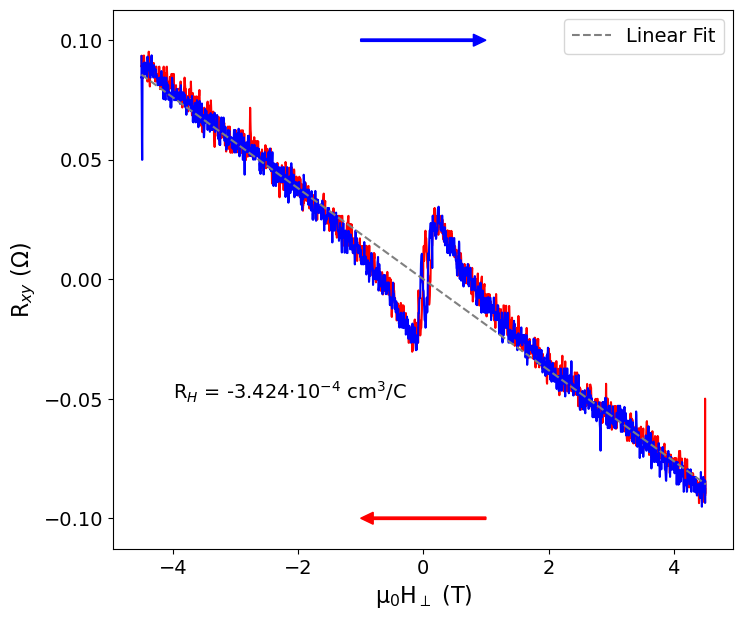

In [754]:
axis_font_options = {'size' : 16}
title_font_options = {'size' : 16}

fig = plt.figure(figsize=(8,7))

plt.plot(field_fwd, (hall_effect_fwd - hall_effect_rev_new[::-1]) / 2, color='r')
plt.plot(field_fwd, (hall_effect_rev_new - hall_effect_fwd[::-1]) / 2, color='b')
plt.plot(field_fwd, popt[0] * field_fwd, color='grey', linestyle='--', label='Linear Fit')

text_dict = {'size' : 14}
plt.text(-4, -0.05, r'R$_H$ = ' + f'{popt[0] * 1e8 * 1.8e-6:.3f}' + r'$\cdot10^{-4}$ cm$^3$/C', fontdict=text_dict)

plt.xlabel(r'μ$_0$H$_{\perp}$ (T)', fontdict=axis_font_options)
plt.ylabel(r'R$_{xy}$ ($\Omega$)', fontdict=axis_font_options)

plt.arrow(-1, 0.1, 2, 0, color='b', head_width=0.005, head_length=0.2, length_includes_head=True)
plt.arrow(1, -0.1, -2, 0, color='r', head_width=0.005, head_length=0.2, length_includes_head=True)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [380]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS Hall Effect.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

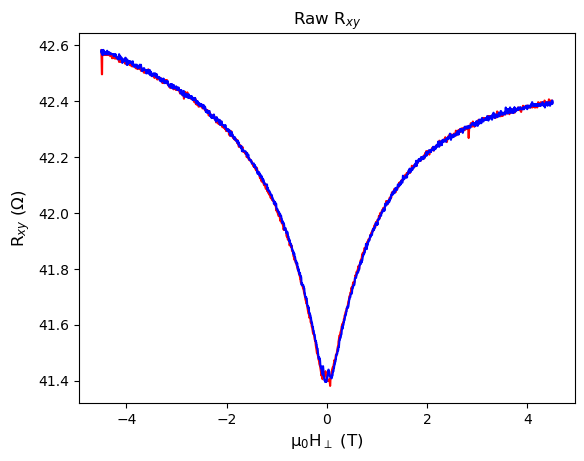

In [397]:
axis_font_options = {'size' : 12}
title_font_options = {'size' : 12}

fig = plt.figure()

plt.plot(field_fwd, hall_effect_rev_new, color='r')
plt.plot(field_fwd, hall_effect_fwd, color='b')

plt.title(r'Raw R$_{xy}$')
plt.xlabel(r'μ$_0$H$_{\perp}$ (T)', fontdict=axis_font_options)
plt.ylabel(r'R$_{xy}$ ($\Omega$)', fontdict=axis_font_options)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [755]:
dat_bulk_hall = pandas.read_csv('')

AssertionError: Data file type not supported

### 1f/2f at T = 300mK, bluefors 20220909/databases/52_ISBT_0928_DCBiasSweep_2fTest

In [408]:
dat5 = TransportData()

In [407]:
metadata_dict = {'AC Voltage' : 1,
                 'AC Resistor' : 1e6,
                 'AC Freq' : 23.3333,
                 'Gain' : 1e3,
                 'Rxy2f Gain' : 5e2,
                 'Pre-amp Settings' : '6dB LPF 10kHz Cutoff',
                 'Current Pre-amp Sensitivity' : 1e-5}
createMetadataIfNone(metadata_dict)

In [406]:
dat5.data['results-2-1']

id     time     Isd_X   V47_f_P   V34_f_P  \
keithley1_dc_source_voltage                                                   
-4.00                        11207.5  207.157 -0.047112 -4.948540  0.490215   
-3.99                        11193.5  206.907 -0.047127 -5.023720  0.411760   
-3.98                        11179.5  206.641 -0.047150 -3.630003  0.181553   
-3.97                        11165.5  206.391 -0.047173 -1.254748 -0.070185   
-3.96                        11151.5  206.141 -0.047203 -0.230908 -0.100952   
...                              ...      ...       ...       ...       ...   
 3.96                           63.5    1.094 -0.047425 -0.160747 -0.111909   
 3.97                           49.5    0.829 -0.047379 -0.178809 -0.095421   
 3.98                           35.5    0.563 -0.047356 -0.305820 -0.070756   
 3.99                           21.5    0.313 -0.047356 -0.399563 -0.065706   
 4.00                            7.5    0.063 -0.047364 -0.430088 -0.076531   

                              V47_f_X  V47_2f_P   V34_f_X    Isd_P  V47_2f_X  \
keithley1_dc_source_voltage                                                    
-4.00                        0.020361    -2.664  0.057788  179.952  0.000420   
-3.99                        0.019376     0.882  0.058157  179.892  0.000439   
-3.98                        0.018556     3.774  0.058470  179.820  0.000324   
-3.97                        0.018146    11.688  0.058668  179.784  0.000122   
-3.96                        0.018045    90.000  0.058757  179.832  0.000000   
...                               ...       ...       ...      ...       ...   
 3.96                        0.018406   -92.292  0.058902  179.820 -0.000008   
 3.97                        0.018412   -92.388  0.058834  179.850 -0.000004   
 3.98                        0.018404   -92.388  0.058803  179.880 -0.000004   
 3.99                        0.018388   -92.388  0.058803  179.904 -0.000004   
 4.00                        0.018377   -92.388  0.058820  179.904 -0.000004   

                             V47_2f_Y  lakeshore_372_ch09_temperature  \
keithley1_dc_source_voltage                                             
-4.00                       -0.000027                        0.300636   
-3.99                        0.000000                        0.300755   
-3.98                        0.000019                        0.300661   
-3.97                        0.000023                        0.300505   
-3.96                        0.000011                        0.300347   
...                               ...                             ...   
 3.96                       -0.000084                        0.300330   
 3.97                       -0.000084                        0.300449   
 3.98                       -0.000080                        0.300596   
 3.99                       -0.000080                        0.300688   
 4.00                       -0.000080                        0.300770   

                               V34_2f_P  V34_2f_Y  V34_2f_X  
keithley1_dc_source_voltage                                  
-4.00                        173.881165  0.000029 -0.000263  
-3.99                        178.754395  0.000006 -0.000269  
-3.98                       -170.819778 -0.000033 -0.000216  
-3.97                       -147.903366 -0.000057 -0.000099  
-3.96                        -76.616585 -0.000059  0.000012  
...                                 ...       ...       ...  
 3.96                         75.582741  0.000074  0.000019  
 3.97                         68.767159  0.000066  0.000025  
 3.98                         73.177917  0.000065  0.000020  
 3.99                         82.262131  0.000057  0.000008  
 4.00                         79.482536  0.000057  0.000010  

[801 rows x 15 columns]

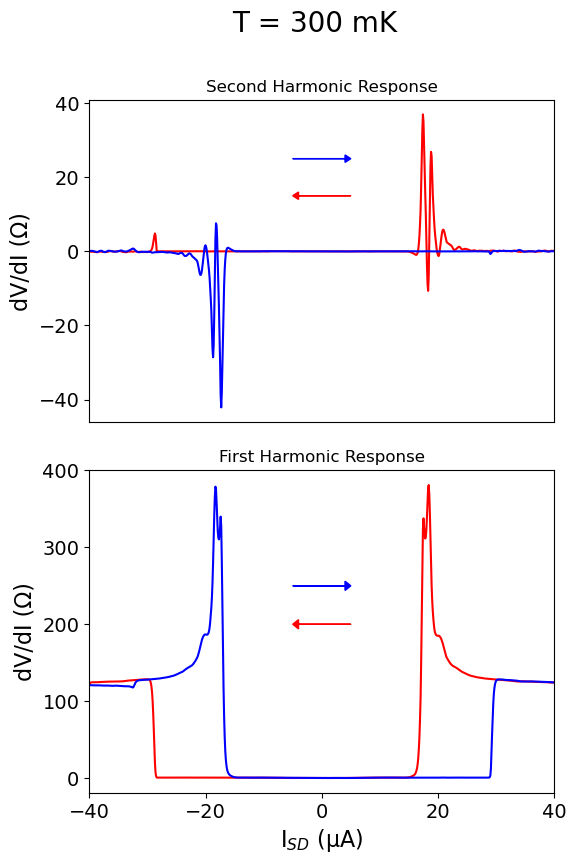

In [709]:
axis_font_options = {'size' : 16}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure(figsize=(6,9))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1])
plt.suptitle('T = 300 mK', fontsize=20)

ax0 = plt.subplot(gs[0])
ax0.plot(dat5.data['results-2-1']['V34_2f_Y'].index * 10, 
         dat5.data['results-2-1']['V34_2f_Y'] / dat5.data['results-2-1']['Isd_X'] / -dat5.metadata['Current Pre-amp Sensitivity'] / dat5.metadata['Gain'],
         color='r')
ax0.plot(dat5.data['results-3-1']['V34_2f_Y'].index * 10,
         dat5.data['results-3-1']['V34_2f_Y'] / dat5.data['results-3-1']['Isd_X'] / -dat5.metadata['Current Pre-amp Sensitivity'] / dat5.metadata['Gain'],
         color='b')


ax0.arrow(-5, 25, 10, 0, color='b', head_width=2, head_length=1, length_includes_head=True)
ax0.arrow(5, 15, -10, 0, color='r', head_width=2, head_length=1, length_includes_head=True)

ax0.set_title('Second Harmonic Response')
ax0.set_xlim([-40, 40])
ax0.set_ylabel(r'dV/dI (Ω)', fontdict=axis_font_options)
ax0.tick_params(labelsize=14)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(dat5.data['results-2-1']['V34_f_X'].index * 10,
         dat5.data['results-2-1']['V34_f_X'] / dat5.data['results-2-1']['Isd_X'] / -dat5.metadata['Current Pre-amp Sensitivity'] / dat5.metadata['Gain'],
         color='r')
ax1.plot(dat5.data['results-3-1']['V34_f_X'].index * 10, 
         dat5.data['results-3-1']['V34_f_X'] / dat5.data['results-3-1']['Isd_X'] / -dat5.metadata['Current Pre-amp Sensitivity'] / dat5.metadata['Gain'],
         color='b')

ax1.arrow(-5, 250, 10, 0, color='b', head_width=12, head_length=1, length_includes_head=True)
ax1.arrow(5, 200, -10, 0, color='r', head_width=12, head_length=1, length_includes_head=True)

ax1.set_title('First Harmonic Response')
ax1.set_xlim([-40, 40])
ax1.set_xlabel(r'I$_{SD}$ (μA)', fontdict=axis_font_options)
ax1.set_ylabel(r'dV/dI (Ω)', fontdict=axis_font_options)
ax1.tick_params(labelsize=14)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax0.get_xticklines(), visible=False)

plt.subplots_adjust(hspace=0.15)

plt.show()

In [711]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS 1f 2f T=300mK.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

### integrate 1f/2f data T = 300mK 20220909/databases/52_ISBT_0928_DCBiasSweep_2fTest

In [726]:
fwd_int_f = scipy.integrate.cumtrapz(dat5.data['results-3-1']['V34_f_X'] / dat5.data['results-3-1']['Isd_X'] / -dat5.metadata['Current Pre-amp Sensitivity'] / dat5.metadata['Gain'],
                                  dat5.data['results-3-1']['V34_f_X'].index / 1e5,
                                  initial=0)
fwd_int_f = fwd_int_f - fwd_int_f[len(fwd_int_f)//2]

fwd_int_2f = scipy.integrate.cumtrapz(dat5.data['results-3-1']['V34_2f_Y'] / dat5.data['results-3-1']['Isd_X'] / -dat5.metadata['Current Pre-amp Sensitivity'] / dat5.metadata['Gain'],
                                  dat5.data['results-3-1']['V34_2f_Y'].index / 1e5,
                                  initial=0)
fwd_int_2f = fwd_int_2f - fwd_int_2f[len(fwd_int_2f)//2]
'''
fwd_int_2f = scipy.integrate.cumtrapz(fwd_int_2f, dat5.data['results-3-1']['V34_2f_Y'].index / 1e5, initial=0)
fwd_int_2f = fwd_int_2f - fwd_int_2f[len(fwd_int_2f)//2]
'''

rev_int_f = scipy.integrate.cumtrapz(dat5.data['results-2-1']['V34_f_X'] / dat5.data['results-2-1']['Isd_X'] / -dat5.metadata['Current Pre-amp Sensitivity'] / dat5.metadata['Gain'],
                                  dat5.data['results-2-1']['V34_f_X'].index / 1e5,
                                  initial=0)
rev_int_f = rev_int_f - rev_int_f[len(rev_int_f)//2]

rev_int_2f = scipy.integrate.cumtrapz(dat5.data['results-2-1']['V34_2f_Y'] / dat5.data['results-2-1']['Isd_X'] / -dat5.metadata['Current Pre-amp Sensitivity'] / dat5.metadata['Gain'],
                                  dat5.data['results-2-1']['V34_2f_Y'].index / 1e5,
                                  initial=0)
rev_int_2f = rev_int_2f - rev_int_2f[len(rev_int_2f)//2]
'''
rev_int_2f = scipy.integrate.cumtrapz(rev_int_2f, dat5.data['results-2-1']['V34_2f_Y'].index / 1e5, initial=0)
rev_int_2f = rev_int_2f - rev_int_2f[len(rev_int_2f)//2]
'''

"\nrev_int_2f = scipy.integrate.cumtrapz(rev_int_2f, dat5.data['results-2-1']['V34_2f_Y'].index / 1e5, initial=0)\nrev_int_2f = rev_int_2f - rev_int_2f[len(rev_int_2f)//2]\n"

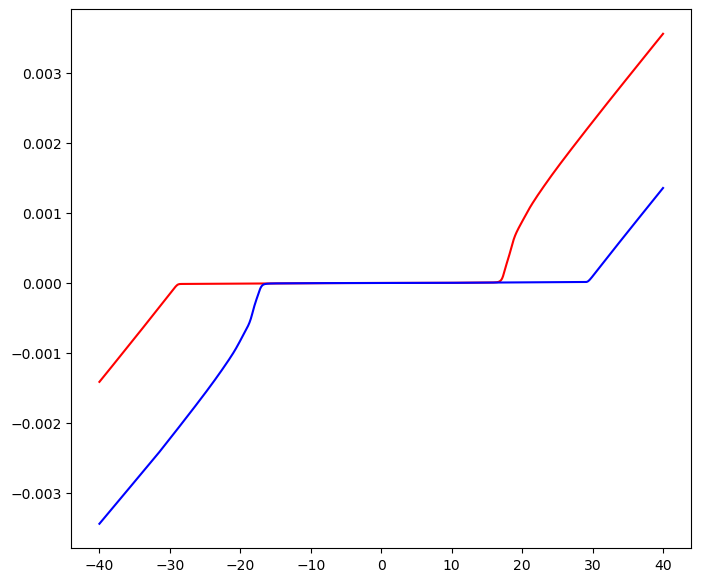

In [718]:
fig = plt.figure(figsize=(8,7))
plt.plot(dat5.data['results-2-1']['V34_2f_Y'].index * 10, rev_int_2f + rev_int_f,
         color='r')
plt.plot(dat5.data['results-3-1']['V34_2f_Y'].index * 10, fwd_int_2f + fwd_int_f,
         color='b')
plt.show()

### DC data T = 300mK bluefors 20220909/databases/22_ISBT_0915_sweepDCbias_SuperFineSweep_300mK.db

In [697]:
metadata_dict = {'Gain' : 10}
createMetadataIfNone(metadata_dict)

In [698]:
dat9 = TransportData()

In [700]:
dat9.data['experiments'][145:155]

exp_id         name                       sample_name  start_time  \
145     146  sweepDCbias  T=0.3_B=-0.00600T_backward_sweep  1663320299   
146     147  sweepDCbias                 T=0.3_B=-0.00400T  1663320513   
147     148  sweepDCbias  T=0.3_B=-0.00400T_backward_sweep  1663320722   
148     149  sweepDCbias                 T=0.3_B=-0.00200T  1663320936   
149     150  sweepDCbias  T=0.3_B=-0.00200T_backward_sweep  1663321145   
150     151  sweepDCbias                  T=0.3_B=0.00000T  1663321359   
151     152  sweepDCbias   T=0.3_B=0.00000T_backward_sweep  1663321568   
152     153  sweepDCbias                  T=0.3_B=0.00200T  1663321782   
153     154  sweepDCbias   T=0.3_B=0.00200T_backward_sweep  1663321991   
154     155  sweepDCbias                  T=0.3_B=0.00400T  1663322206   

    end_time  run_counter format_string  
145     None            1      {}-{}-{}  
146     None            1      {}-{}-{}  
147     None            1      {}-{}-{}  
148     None            1      {}-{}-{}  
149     None            1      {}-{}-{}  
150     None            1      {}-{}-{}  
151     None            1      {}-{}-{}  
152     None            1      {}-{}-{}  
153     None            1      {}-{}-{}  
154     None            1      {}-{}-{}

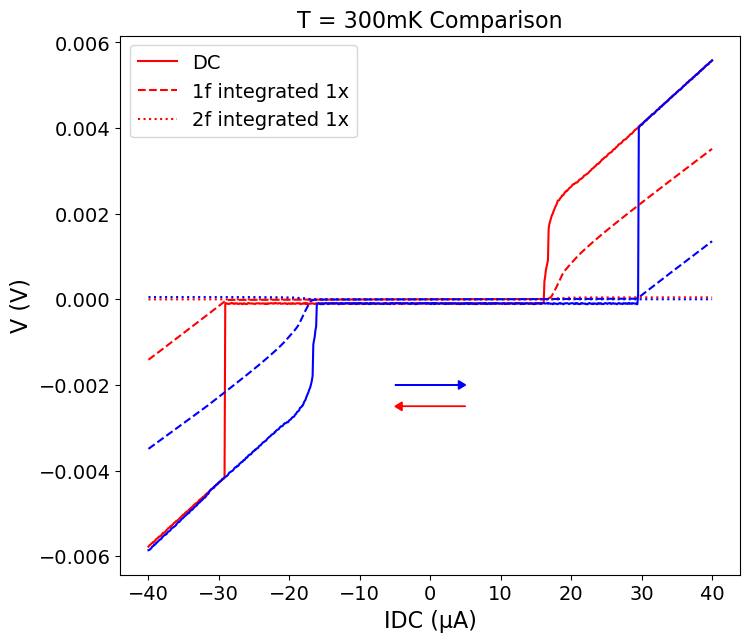

In [730]:
axis_font_options = {'size' : 16}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure(figsize=(8,7))

plt.plot(dat9.data['results-152-1']['keithley1_dc_sense_voltage'].index * 1e6, 
         dat9.data['results-152-1']['keithley1_dc_sense_voltage'] / dat9.metadata['Gain'], 
         color='r', label='DC')
plt.plot(dat9.data['results-151-1']['keithley1_dc_sense_voltage'].index * 1e6, 
         dat9.data['results-151-1']['keithley1_dc_sense_voltage'] / dat9.metadata['Gain'], 
         color='b')

plt.plot(dat5.data['results-2-1']['V34_2f_Y'].index * 10, rev_int_f,
         color='r', linestyle='--', label='1f integrated 1x')
plt.plot(dat5.data['results-3-1']['V34_2f_Y'].index * 10, fwd_int_f,
         color='b', linestyle='--')

plt.plot(dat5.data['results-2-1']['V34_2f_Y'].index * 10, rev_int_2f,
         color='r', linestyle=':', label='2f integrated 1x')
plt.plot(dat5.data['results-3-1']['V34_2f_Y'].index * 10, fwd_int_2f,
         color='b', linestyle=':')

plt.arrow(-5, -0.002, 10, 0, color='b', head_width=0.0002, head_length=1, width = 0.000001, length_includes_head=True)
plt.arrow(5, -0.0025, -10, 0, color='r', head_width=0.0002, head_length=1, width = 0.000001, length_includes_head=True)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('IDC (μΑ)', fontdict=axis_font_options)
plt.ylabel('V (V)', fontdict=axis_font_options)
plt.title('T = 300mK Comparison', fontdict=title_font_options)
plt.show()

### 1f/2f at T = 1.4K bluefors 20220909/databases/83_ISBT_1007_dVdI_IDCSweep_2f_1p4K.db

In [435]:
dat6 = TransportData()

In [438]:
dat6.data['experiments'][120:124]

exp_id                       name                    sample_name  \
120     121  DCbiasSweep_FixField_1p5K                _B=-0.00000T_up   
121     122  DCbiasSweep_FixField_1p5K              _B=-0.00000T_down   
122     123  DCbiasSweep_FixField_1p5K  Bsweep_-0.00000T_to_-0.02500T   
123     124  DCbiasSweep_FixField_1p5K                _B=-0.02500T_up   

     start_time end_time  run_counter format_string  
120  1665226959     None            1      {}-{}-{}  
121  1665227221     None            1      {}-{}-{}  
122  1665227482     None            1      {}-{}-{}  
123  1665227506     None            1      {}-{}-{}

In [439]:
dat6.data['results-121-1']

id     time  V34_2f_Y  \
keithley1_dc_source_voltage                               
-2.500                           7.5    0.109 -0.000067   
-2.495                          21.5    0.375 -0.000070   
-2.490                          35.5    0.640 -0.000083   
-2.485                          49.5    0.906 -0.000098   
-2.480                          63.5    1.172 -0.000091   
...                              ...      ...       ...   
 2.480                       13951.5  258.828 -0.000055   
 2.485                       13965.5  259.094 -0.000018   
 2.490                       13979.5  259.359  0.000030   
 2.495                       13993.5  259.609  0.000080   
 2.500                       14007.5  259.875  0.000117   

                             lakeshore_372_ch09_temperature  V34_2f_X  \
keithley1_dc_source_voltage                                             
-2.500                                              1.42128 -0.000005   
-2.495                                              1.42195 -0.000003   
-2.490                                              1.42143  0.000004   
-2.485                                              1.41908  0.000017   
-2.480                                              1.41758  0.000033   
...                                                     ...       ...   
 2.480                                              1.41537  0.000012   
 2.485                                              1.41489  0.000035   
 2.490                                              1.41463  0.000033   
 2.495                                              1.41328  0.000027   
 2.500                                              1.41287  0.000036   

                             V47_2f_Y    Isd_P  V47_2f_X  V47_2f_P     Isd_X  \
keithley1_dc_source_voltage                                                    
-2.500                       0.000057  179.898  0.000003    86.634 -0.094658   
-2.495                       0.000063  179.904  0.000004    85.986 -0.094651   
-2.490                       0.000065  179.904  0.000006    84.690 -0.094643   
-2.485                       0.000072  179.922  0.000008    83.700 -0.094635   
-2.480                       0.000084  179.940  0.000008    84.498 -0.094658   
...                               ...      ...       ...       ...       ...   
 2.480                      -0.000051  179.844 -0.000006   -96.624 -0.094834   
 2.485                      -0.000060  179.850 -0.000002   -92.232 -0.094849   
 2.490                      -0.000066  179.838 -0.000004   -93.708 -0.094811   
 2.495                      -0.000067  179.820 -0.000007   -96.192 -0.094735   
 2.500                      -0.000067  179.808 -0.000007   -95.700 -0.094643   

                              V34_f_P   V34_f_X   V47_f_X   V34_2f_P   V47_f_P  
keithley1_dc_source_voltage                                                     
-2.500                      -0.040812  0.114663  0.043742 -93.951035 -0.265976  
-2.495                      -0.039055  0.114668  0.043731 -90.068092 -0.243505  
-2.490                      -0.032797  0.114653  0.043725 -84.510452 -0.225104  
-2.485                      -0.015532  0.114652  0.043713 -77.404297 -0.205385  
-2.480                       0.003463  0.114699  0.043714 -65.660240 -0.186602  
...                               ...       ...       ...        ...       ...  
 2.480                      -0.100607  0.115063  0.043686 -62.282646 -0.204981  
 2.485                      -0.101860  0.115066  0.043717   2.729224 -0.156674  
 2.490                      -0.115167  0.115008  0.043691  59.925247 -0.171192  
 2.495                      -0.127586  0.114911  0.043645  74.313141 -0.220359  
 2.500                      -0.127964  0.114791  0.043596  70.909386 -0.272560  

[1001 rows x 15 columns]

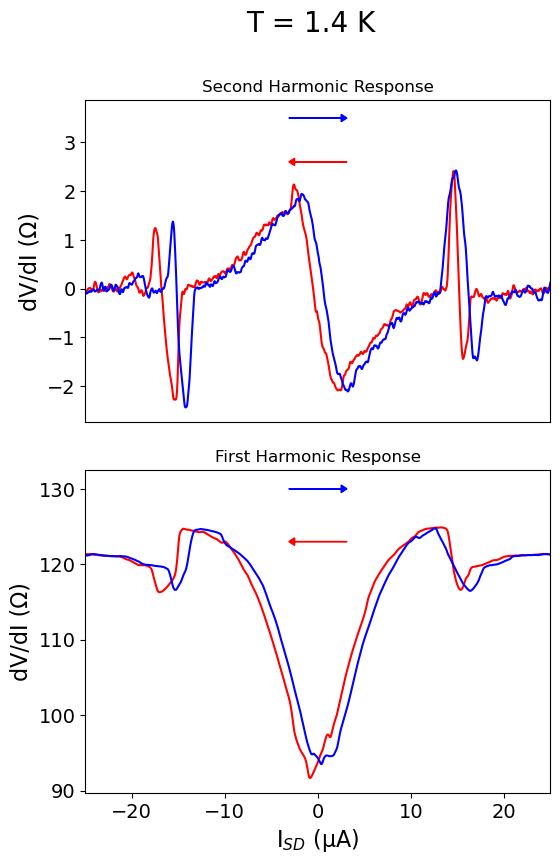

In [673]:
axis_font_options = {'size' : 16}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure(figsize=(6,9))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1])
plt.suptitle('T = 1.4 K', fontsize=20)

ax0 = plt.subplot(gs[0])
ax0.plot(dat6.data['results-122-1']['V34_2f_Y'].index * 10,
         dat6.data['results-122-1']['V34_2f_Y'] / dat6.data['results-122-1']['Isd_X'] / -dat6.metadata['Current Pre-amp Sensitivity'] / dat6.metadata['Gain'],
         color='r')
ax0.plot(dat6.data['results-121-1']['V34_2f_Y'].index * 10, 
         dat6.data['results-121-1']['V34_2f_Y'] / dat6.data['results-121-1']['Isd_X'] / -dat6.metadata['Current Pre-amp Sensitivity'] / dat6.metadata['Gain'],
         color='b')

ax0.arrow(-3.125, 3.5, 6.25, 0, color='b', head_width=0.15, head_length=0.625, length_includes_head=True)
ax0.arrow(3.125, 2.6, -6.25, 0, color='r', head_width=0.15, head_length=0.625, length_includes_head=True)

ax0.set_title('Second Harmonic Response')
ax0.set_xlim([-25, 25])
ax0.set_ylabel(r'dV/dI (Ω)', fontdict=axis_font_options)
ax0.tick_params(labelsize=14)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(dat6.data['results-122-1']['V34_f_X'].index * 10, 
         dat6.data['results-122-1']['V34_f_X'] / dat6.data['results-122-1']['Isd_X'] / -dat6.metadata['Current Pre-amp Sensitivity'] / dat6.metadata['Gain'],
         color='r')
ax1.plot(dat6.data['results-121-1']['V34_f_X'].index * 10,
         dat6.data['results-121-1']['V34_f_X'] / dat6.data['results-121-1']['Isd_X'] / -dat6.metadata['Current Pre-amp Sensitivity'] / dat6.metadata['Gain'],
         color='b')

ax1.arrow(-3.125, 130, 6.25, 0, color='b', head_width=1, head_length=0.625, length_includes_head=True)
ax1.arrow(3.125, 123, -6.25, 0, color='r', head_width=1, head_length=0.625, length_includes_head=True)

ax1.set_title('First Harmonic Response')
ax1.set_xlim([-25, 25])
ax1.set_xlabel(r'I$_{SD}$ (μA)', fontdict=axis_font_options)
ax1.set_ylabel(r'dV/dI (Ω)', fontdict=axis_font_options)
ax1.tick_params(labelsize=14)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax0.get_xticklines(), visible=False)

plt.subplots_adjust(hspace=0.15)

plt.show()

In [674]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS 1f 2f T=1.4K.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

### 1f/2f T = 2K ppms 20221012/databases/15_1015_BiasSweep_StepField.db

In [468]:
dat7 = TransportData()

/Users/jackbarlow/OptoTransportAnalysis/src/OptoTransport/Data.py:72: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data[f'{row["result_table_name"]}'] = pandas.read_sql(f'{row["result_table_name"]}', eng.connect()).groupby(run_params[0]).agg(numpy.nanmean)


In [528]:
dat7.data['experiments']

exp_id                 name                        sample_name  \
0         1  SweepBias_StepField  T=2K_AC=5uA_init_field_to_-2.0000   
1         2  SweepBias_StepField  T=2K_AC=5uA_init_bias_to_-40.0000   
2         3  SweepBias_StepField      T=2K_AC=5uA_B=-2.0000_bias_up   
3         4  SweepBias_StepField    T=2K_AC=5uA_B=-2.0000_bias_down   
4         5  SweepBias_StepField  T=2K_AC=5uA_ramp_field_to_-1.9500   
..      ...                  ...                                ...   
214     215  SweepBias_StepField   T=2K_AC=5uA_ramp_field_to_1.5500   
215     216  SweepBias_StepField       T=2K_AC=5uA_B=1.5500_bias_up   
216     217  SweepBias_StepField     T=2K_AC=5uA_B=1.5500_bias_down   
217     218  SweepBias_StepField   T=2K_AC=5uA_ramp_field_to_1.6000   
218     219  SweepBias_StepField       T=2K_AC=5uA_B=1.6000_bias_up   

     start_time end_time  run_counter format_string  
0    1665887620     None            1      {}-{}-{}  
1    1665887727     None            1      {}-{}-{}  
2    1665887933     None            1      {}-{}-{}  
3    1665888343     None            1      {}-{}-{}  
4    1665888753     None            1      {}-{}-{}  
..          ...      ...          ...           ...  
214  1665946989     None            1      {}-{}-{}  
215  1665946999     None            1      {}-{}-{}  
216  1665947409     None            1      {}-{}-{}  
217  1665947819     None            1      {}-{}-{}  
218  1665947829     None            1      {}-{}-{}  

[219 rows x 7 columns]

In [476]:
dat7.data['results-123-1']

id     time  Isd_812_P  Vxx_2f_910_X  \
keithley_source_voltage                                              
-4.00                        7.5    0.453    176.916      0.000003   
-3.99                       21.5    0.953    176.916      0.000002   
-3.98                       35.5    1.469    176.916      0.000005   
-3.97                       49.5    1.985    176.916      0.000011   
-3.96                       63.5    2.500    176.928      0.000009   
...                          ...      ...        ...           ...   
 3.96                    11151.5  405.563    176.922      0.000002   
 3.97                    11165.5  406.078    176.922     -0.000002   
 3.98                    11179.5  406.594    176.928     -0.000003   
 3.99                    11193.5  407.094    176.916     -0.000003   
 4.00                    11207.5  407.594    176.904     -0.000008   

                         Vxx_1f_910_P  Vxy_2f_1013_Y  Vxy_1f_1013_X  \
keithley_source_voltage                                               
-4.00                          -3.168   1.257085e-05       0.204682   
-3.99                          -3.168   1.273141e-05       0.204713   
-3.98                          -3.168   1.147703e-05       0.204774   
-3.97                          -3.168   1.155009e-05       0.204774   
-3.96                          -3.156   1.401241e-05       0.204743   
...                               ...            ...            ...   
 3.96                          -3.168   3.321597e-06       0.204774   
 3.97                          -3.162   1.283652e-06       0.204713   
 3.98                          -3.156   8.980494e-07       0.204652   
 3.99                          -3.162   3.948857e-06       0.204682   
 4.00                          -3.180   4.415594e-06       0.204713   

                         Vxx_2f_910_P  dynacool_temperature  Vxy_1f_1013_P  \
keithley_source_voltage                                                      
-4.00                          86.766              2.004102         -3.144   
-3.99                          87.102              2.004688         -3.138   
-3.98                          82.014              2.005113         -3.144   
-3.97                          73.092              2.005113         -3.138   
-3.96                          79.782              2.004139         -3.120   
...                               ...                   ...            ...   
 3.96                         -83.916              1.999997         -3.138   
 3.97                         -96.852              1.999952         -3.138   
 3.98                         -95.730              1.999950         -3.144   
 3.99                         -99.858              2.000090         -3.162   
 4.00                        -111.690              2.000090         -3.156   

                         Vxy_2f_1013_P  Vxy_2f_1013_X  Isd_812_X  \
keithley_source_voltage                                            
-4.00                        86.587852   7.430606e-07  -0.048798   
-3.99                        88.358002   3.647046e-07  -0.048798   
-3.98                        83.259491   1.349429e-06  -0.048806   
-3.97                        74.624771   3.231654e-06  -0.048817   
-3.96                        82.413559   1.863822e-06  -0.048821   
...                                ...            ...        ...   
 3.96                        48.791725   2.812792e-06  -0.048794   
 3.97                        39.565922   1.313117e-06  -0.048794   
 3.98                        27.731342   1.897066e-06  -0.048783   
 3.99                        68.882996   1.661648e-06  -0.048779   
 4.00                        88.749428   7.295752e-08  -0.048786   

                         Vxx_1f_910_X  Vxx_2f_910_Y  
keithley_source_voltage                              
-4.00                        0.599003      0.000042  
-3.99                        0.599003      0.000043  
-3.98                        0.599125      0.000038  
-3.97                    

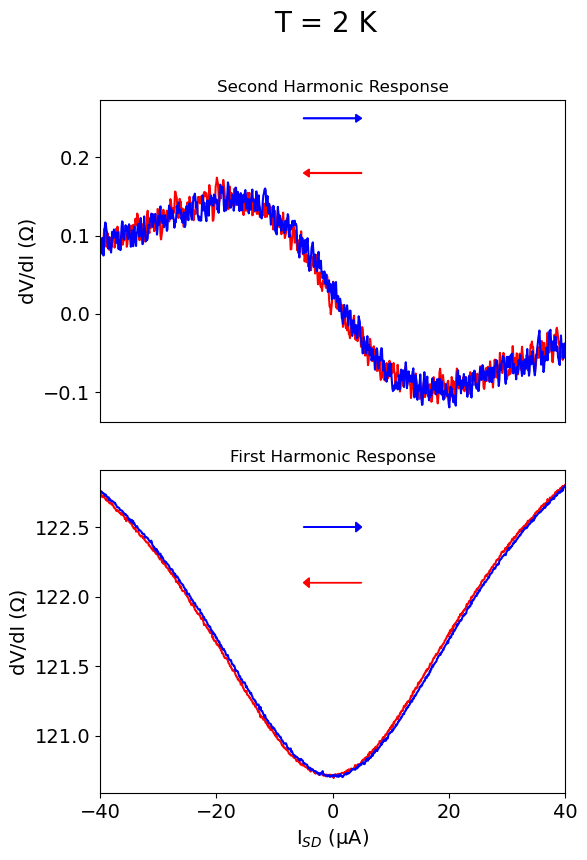

In [670]:
axis_font_options = {'size' : 14}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

fig = plt.figure(figsize=(6,9))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1])
plt.suptitle('T = 2 K', fontsize=20)

ax0 = plt.subplot(gs[0])
ax0.plot(dat7.data['results-124-1']['Vxx_2f_910_Y'].index * 10,
         dat7.data['results-124-1']['Vxx_2f_910_Y'] / dat7.data['results-124-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'],
         color='r')
ax0.plot(dat7.data['results-123-1']['Vxx_2f_910_Y'].index * 10, 
         dat7.data['results-123-1']['Vxx_2f_910_Y'] / dat7.data['results-123-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'],
         color='b')

ax0.arrow(-5, 0.25, 10, 0, color='b', head_width=0.01, head_length=1, length_includes_head=True)
ax0.arrow(5, 0.18, -10, 0, color='r', head_width=0.01, head_length=1, length_includes_head=True)

ax0.set_title('Second Harmonic Response')
ax0.set_xlim([-40, 40])
ax0.set_ylabel(r'dV/dI (Ω)', fontdict=axis_font_options)
ax0.tick_params(labelsize=14)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(dat7.data['results-124-1']['Vxx_1f_910_X'].index * 10,
         dat7.data['results-124-1']['Vxx_1f_910_X'] / dat7.data['results-124-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'] / 10,
         color='r')
ax1.plot(dat7.data['results-123-1']['Vxx_1f_910_X'].index * 10, 
         dat7.data['results-123-1']['Vxx_1f_910_X'] / dat7.data['results-123-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'] / 10,
         color='b')

ax1.arrow(-5, 122.5, 10, 0, color='b', head_width=0.07, head_length=1, length_includes_head=True)
ax1.arrow(5, 122.1, -10, 0, color='r', head_width=0.07, head_length=1, length_includes_head=True)

ax1.set_title('First Harmonic Response')
ax1.set_xlim([-40, 40])
ax1.set_xlabel(r'I$_{SD}$ (μA)', fontdict=axis_font_options)
ax1.set_ylabel(r'dV/dI (Ω)', fontdict=axis_font_options)
ax1.tick_params(labelsize=14)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax0.get_xticklines(), visible=False)

plt.subplots_adjust(hspace=0.15)

plt.show()

In [671]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS 1f 2f T=2K.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')

### Integrate T = 2K data

In [751]:
fwd_int_f = scipy.integrate.cumtrapz(dat7.data['results-123-1']['Vxx_1f_910_X'] / dat7.data['results-123-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'] / 10,
                                     dat7.data['results-123-1']['Vxx_1f_910_X'].index / 1e5,
                                     initial=0)
fwd_int_f = fwd_int_f - fwd_int_f[len(fwd_int_f)//2]

fwd_int_2f = scipy.integrate.cumtrapz(dat7.data['results-123-1']['Vxx_2f_910_Y'] / dat7.data['results-123-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'],
                                      dat7.data['results-123-1']['Vxx_2f_910_Y'].index / 1e5,
                                      initial=0)
fwd_int_2f = fwd_int_2f - fwd_int_2f[len(fwd_int_2f)//2]

fwd_int_2f = scipy.integrate.cumtrapz(fwd_int_2f, dat5.data['results-3-1']['V34_2f_Y'].index / 1e5, initial=0)
fwd_int_2f = fwd_int_2f - fwd_int_2f[len(fwd_int_2f)//2]

rev_int_f = scipy.integrate.cumtrapz(dat7.data['results-124-1']['Vxx_1f_910_X'] / dat7.data['results-124-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'] / 10,
                                     dat7.data['results-124-1']['Vxx_1f_910_X'].index / 1e5,
                                     initial=0)
rev_int_f = rev_int_f - rev_int_f[len(rev_int_f)//2]

rev_int_2f = scipy.integrate.cumtrapz(dat7.data['results-124-1']['Vxx_2f_910_Y'] / dat7.data['results-124-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'],
                                      dat7.data['results-124-1']['Vxx_2f_910_Y'].index / 1e5,
                                      initial=0)
rev_int_2f = rev_int_2f - rev_int_2f[len(rev_int_2f)//2]

rev_int_2f = scipy.integrate.cumtrapz(rev_int_2f, dat5.data['results-2-1']['V34_2f_Y'].index / 1e5, initial=0)
rev_int_2f = rev_int_2f - rev_int_2f[len(rev_int_2f)//2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


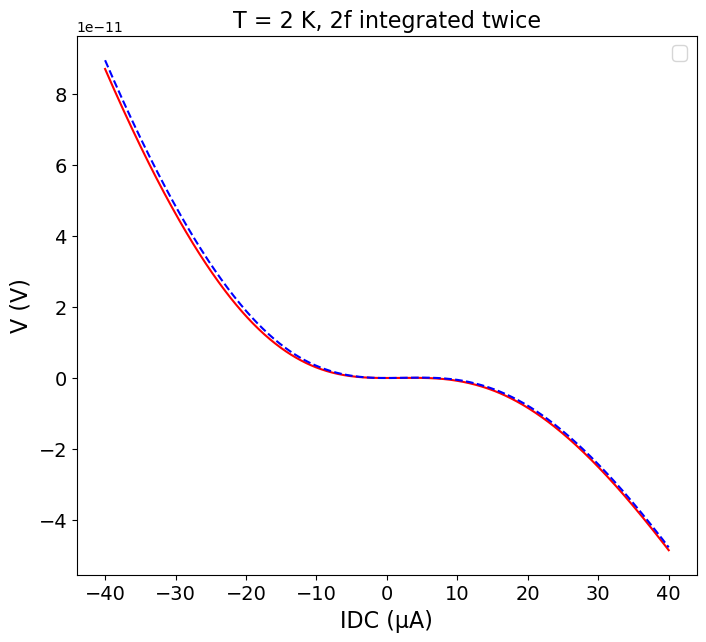

In [753]:
fig = plt.figure(figsize=(8,7))

plt.plot(dat7.data['results-124-1']['Vxx_2f_910_Y'].index * 10, rev_int_2f,
         color='r')
plt.plot(dat7.data['results-123-1']['Vxx_2f_910_Y'].index * 10, fwd_int_2f,
         color='b', linestyle='--')

'''
plt.plot(dat7.data['results-124-1']['Vxx_1f_910_X'].index * 10, rev_int_f,
         color='r', linestyle='-')
plt.plot(dat7.data['results-123-1']['Vxx_1f_910_X'].index * 10, fwd_int_f,
         color='b', linestyle='--')

'''

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('IDC (μΑ)', fontdict=axis_font_options)
plt.ylabel('V (V)', fontdict=axis_font_options)
plt.title('T = 2 K, 2f integrated twice', fontdict=title_font_options)
plt.show()

### colormap 1f/2f ppms 20221012/databases/15_1015_BiasSweep_StepField.db

In [529]:
dat7.data['experiments']

exp_id                 name                        sample_name  \
0         1  SweepBias_StepField  T=2K_AC=5uA_init_field_to_-2.0000   
1         2  SweepBias_StepField  T=2K_AC=5uA_init_bias_to_-40.0000   
2         3  SweepBias_StepField      T=2K_AC=5uA_B=-2.0000_bias_up   
3         4  SweepBias_StepField    T=2K_AC=5uA_B=-2.0000_bias_down   
4         5  SweepBias_StepField  T=2K_AC=5uA_ramp_field_to_-1.9500   
..      ...                  ...                                ...   
214     215  SweepBias_StepField   T=2K_AC=5uA_ramp_field_to_1.5500   
215     216  SweepBias_StepField       T=2K_AC=5uA_B=1.5500_bias_up   
216     217  SweepBias_StepField     T=2K_AC=5uA_B=1.5500_bias_down   
217     218  SweepBias_StepField   T=2K_AC=5uA_ramp_field_to_1.6000   
218     219  SweepBias_StepField       T=2K_AC=5uA_B=1.6000_bias_up   

     start_time end_time  run_counter format_string  
0    1665887620     None            1      {}-{}-{}  
1    1665887727     None            1      {}-{}-{}  
2    1665887933     None            1      {}-{}-{}  
3    1665888343     None            1      {}-{}-{}  
4    1665888753     None            1      {}-{}-{}  
..          ...      ...          ...           ...  
214  1665946989     None            1      {}-{}-{}  
215  1665946999     None            1      {}-{}-{}  
216  1665947409     None            1      {}-{}-{}  
217  1665947819     None            1      {}-{}-{}  
218  1665947829     None            1      {}-{}-{}  

[219 rows x 7 columns]

In [535]:
dat7.data['results-3-1']

id     time  Isd_812_P  Vxx_2f_910_X  \
keithley_source_voltage                                              
-4.00                        7.5    0.359    176.922 -3.933940e-06   
-3.99                       21.5    0.875    176.922 -3.874330e-06   
-3.98                       35.5    1.375    176.910 -8.344710e-06   
-3.97                       49.5    1.891    176.904 -5.185630e-06   
-3.96                       63.5    2.391    176.916 -9.536820e-07   
...                          ...      ...        ...           ...   
 3.96                    11151.5  405.094    176.922  4.410770e-06   
 3.97                    11165.5  405.609    176.934 -2.920640e-06   
 3.98                    11179.5  406.125    176.940 -1.311310e-06   
 3.99                    11193.5  406.641    176.922  2.622620e-06   
 4.00                    11207.5  407.156    176.904 -3.814730e-06   

                         Vxx_1f_910_P  Vxy_2f_1013_Y  Vxy_1f_1013_X  \
keithley_source_voltage                                               
-4.00                          -3.162  -1.224406e-06       0.205659   
-3.99                          -3.162  -1.171387e-06       0.205659   
-3.98                          -3.174  -1.717293e-06       0.205659   
-3.97                          -3.180  -2.634469e-06       0.205720   
-3.96                          -3.162  -6.394515e-07       0.205720   
...                               ...            ...            ...   
 3.96                          -3.162   9.929054e-06       0.205689   
 3.97                          -3.144   1.053673e-05       0.205628   
 3.98                          -3.144   8.931972e-06       0.205567   
 3.99                          -3.156   1.067911e-05       0.205567   
 4.00                          -3.180   1.118780e-05       0.205659   

                         Vxx_2f_910_P  dynacool_temperature  Vxy_1f_1013_P  \
keithley_source_voltage                                                      
-4.00                         130.536              2.000004         -3.138   
-3.99                         130.194              2.000132         -3.138   
-3.98                         168.990              2.000090         -3.156   
-3.97                        -163.884              1.999918         -3.132   
-3.96                         100.404              1.999957         -3.132   
...                               ...                   ...            ...   
 3.96                          80.898              1.999969         -3.126   
 3.97                          98.724              1.999873         -3.132   
 3.98                          92.280              1.999901         -3.132   
 3.99                          83.334              1.999901         -3.162   
 4.00                          98.826              1.999946         -3.156   

                         Vxy_2f_1013_P  Vxy_2f_1013_X  Isd_812_X  \
keithley_source_voltage                                            
-4.00                       -90.990250  -2.688360e-08  -0.048809   
-3.99                       -89.006721   2.438879e-08  -0.048809   
-3.98                      -124.950409  -1.275224e-06  -0.048813   
-3.97                       -98.372185  -3.763046e-07  -0.048824   
-3.96                       -61.355000   1.918130e-07  -0.048828   
...                                ...            ...        ...   
 3.96                        82.972046   1.250532e-06  -0.048828   
 3.97                        98.287872  -1.579571e-06  -0.048821   
 3.98                        92.747116  -3.977394e-07  -0.048806   
 3.99                        83.252869   1.296425e-06  -0.048794   
 4.00                        91.588425  -3.280421e-07  -0.048798   

                         Vxx_1f_910_X  Vxx_2f_910_Y  
keithley_source_voltage                              
-4.00                        0.605595      0.000005  
-3.99                        0.605656      0.000004  
-3.98                        0.605656      0.000001  
-3.97                    

In [613]:
num_fields = 72
currs = dat7.data['results-3-1'].index * 10
num_currs = currs.size
fields = numpy.arange(-2, 1.6 + 3.6/num_fields, 3.6/num_fields)

fwd_array_2f = numpy.empty((num_fields, num_currs))
rev_array_2f = numpy.empty((num_fields, num_currs))
fwd_array_1f = numpy.empty((num_fields, num_currs))
rev_array_1f = numpy.empty((num_fields, num_currs))

for i in range(num_fields):
    j = 3*i+3
    fwd_array_2f[i,:] = dat7.data[f'results-{j}-1']['Vxx_2f_910_Y'] / dat7.data[f'results-{j}-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain']
    rev_array_2f[i,:] = dat7.data[f'results-{j+1}-1']['Vxx_2f_910_Y'] / dat7.data[f'results-{j+1}-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain']
    fwd_array_1f[i,:] = dat7.data[f'results-{j}-1']['Vxx_1f_910_X'] / dat7.data[f'results-{j}-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'] / 10
    rev_array_1f[i,:] = dat7.data[f'results-{j+1}-1']['Vxx_1f_910_X'] / dat7.data[f'results-{j+1}-1']['Isd_812_X'] / -dat7.metadata['Current Pre-amp Sensitivity'] / dat7.metadata['Gain'] / 10



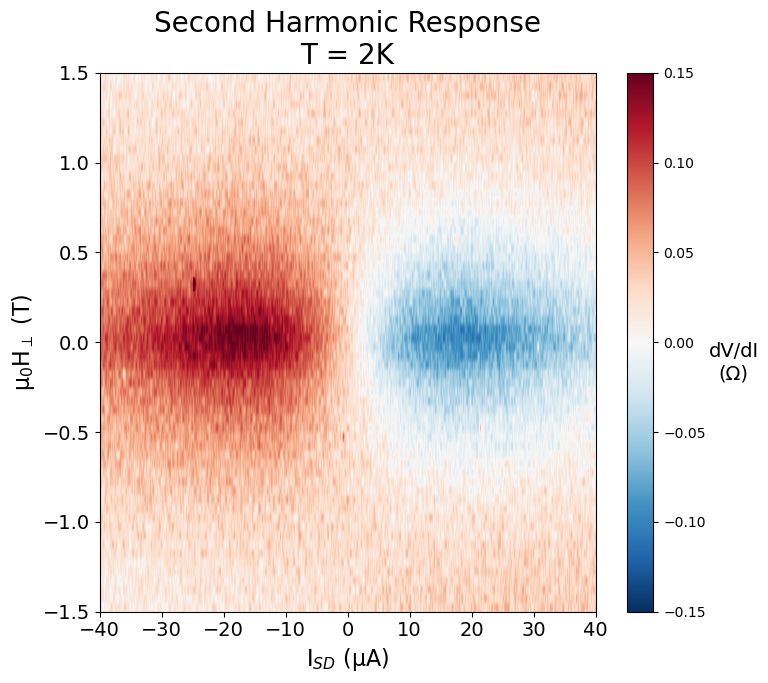

In [626]:
axis_font_options = {'size' : 16}
title_font_options = {'size' : 20}
tick_font_options = {'size' : 14}

fig = plt.figure(figsize=(8,7))

plt.imshow(fwd_array_2f, extent=[currs[0], currs[-1], fields[0], fields[-1]],
           aspect='auto', origin='lower', cmap=cm.RdBu_r, norm=matplotlib.colors.CenteredNorm(halfrange=0.15, clip=True))

plt.ylim([-1.5, 1.5])
plt.ylabel(r'μ$_0$H$_{\perp}$ (T)', fontdict=axis_font_options)
plt.xlabel(r'I$_{SD}$ (μA)', fontdict=axis_font_options)
plt.title('Second Harmonic Response\nT = 2K', fontdict=title_font_options)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

cbar = plt.colorbar()
cbar.set_label('dV/dI\n(Ω)', rotation=0, labelpad=20, fontsize=14)
plt.show()

In [627]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS 2f colormap T=2K.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

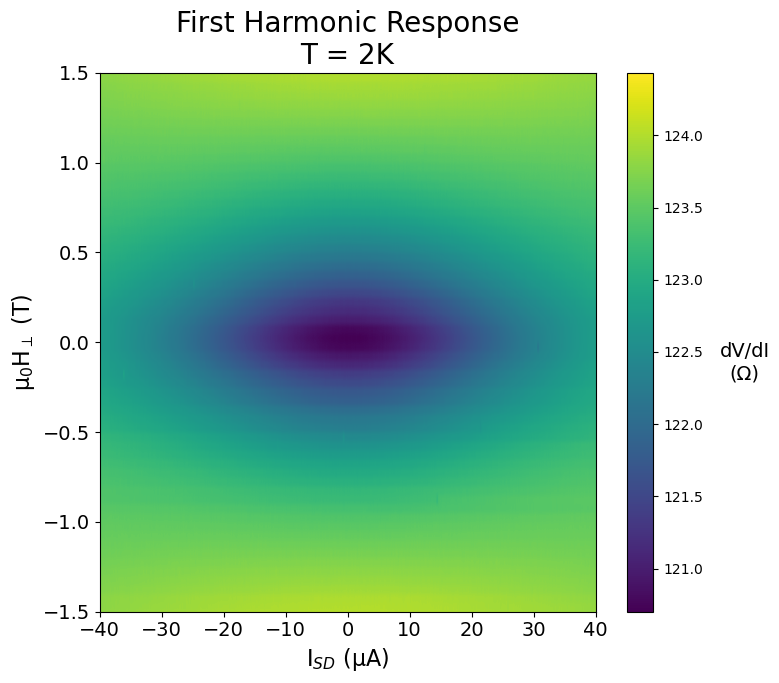

In [630]:
axis_font_options = {'size' : 16}
title_font_options = {'size' : 20}
tick_font_options = {'size' : 14}

fig = plt.figure(figsize=(8,7))

plt.imshow(fwd_array_1f, extent=[currs[0], currs[-1], fields[0], fields[-1]],
           aspect='auto', origin='lower', cmap='viridis')

plt.ylim([-1.5, 1.5])
plt.ylabel(r'μ$_0$H$_{\perp}$ (T)', fontdict=axis_font_options)
plt.xlabel(r'I$_{SD}$ (μA)', fontdict=axis_font_options)
plt.title('First Harmonic Response\nT = 2K', fontdict=title_font_options)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

cbar = plt.colorbar()
cbar.set_label('dV/dI\n(Ω)', rotation=0, labelpad=30, fontsize=14)
plt.show()

In [631]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS 1f colormap T=2K.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

### T-dep 1f/2f colormap ppms 20221012/databases/41_1020_BiasSweep_StepTemp.db

In [814]:
dat8 = TransportData()

AssertionError: Data file type not supported

: 

In [636]:
dat8.data['experiments']

exp_id                 name                         sample_name  \
0         1  SweepField_StepBias  H=0T_AC=20uA_init_bias_to_-50.0000   
1         2  SweepField_StepBias       H=0T_AC=20uA_T=2.0000_bias_up   
2         3  SweepField_StepBias     H=0T_AC=20uA_T=2.0000_bias_down   
3         4  SweepField_StepBias    H=0T_AC=20uA_ramp_temp_to_2.1500   
4         5  SweepField_StepBias       H=0T_AC=20uA_T=2.1500_bias_up   
..      ...                  ...                                 ...   
102     103  SweepField_StepBias    H=0T_AC=20uA_ramp_temp_to_7.1000   
103     104  SweepField_StepBias       H=0T_AC=20uA_T=7.1000_bias_up   
104     105  SweepField_StepBias     H=0T_AC=20uA_T=7.1000_bias_down   
105     106  SweepField_StepBias       H=0T_AC=20uA_reset_temp_to_2K   
106     107  SweepField_StepBias             H=0T_AC=20uA_reset_bias   

     start_time end_time  run_counter format_string  
0    1666323130     None            1      {}-{}-{}  
1    1666323387     None            1      {}-{}-{}  
2    1666323898     None            1      {}-{}-{}  
3    1666324409     None            1      {}-{}-{}  
4    1666324635     None            1      {}-{}-{}  
..          ...      ...          ...           ...  
102  1666365625     None            1      {}-{}-{}  
103  1666365852     None            1      {}-{}-{}  
104  1666366363     None            1      {}-{}-{}  
105  1666366874     None            1      {}-{}-{}  
106  1666368586     None            1      {}-{}-{}  

[107 rows x 7 columns]

In [642]:
dat8.data['results-2-1']

id     time  Isd_812_P  dynacool_temperature  \
keithley_source_voltage                                                      
-5.00                        7.5    0.093    176.898              2.000026   
-4.99                       21.5    0.609    176.898              2.000082   
-4.98                       35.5    1.125    176.898              2.000208   
-4.97                       49.5    1.640    176.892              2.000111   
-4.96                       63.5    2.140    176.892              2.000008   
...                          ...      ...        ...                   ...   
 4.96                    13951.5  506.390    176.898              2.000051   
 4.97                    13965.5  506.890    176.892              2.000193   
 4.98                    13979.5  507.390    176.898              1.999917   
 4.99                    13993.5  507.906    176.898              1.999917   
 5.00                    14007.5  508.406    176.892              2.000007   

                         Vxx_2f_910_Y  Vxy_2f_1013_Y  Vxy_1f_1013_X  \
keithley_source_voltage                                               
-5.00                        0.000401       0.000025       0.081391   
-4.99                        0.000401       0.000024       0.081387   
-4.98                        0.000405       0.000026       0.081387   
-4.97                        0.000406       0.000026       0.081387   
-4.96                        0.000403       0.000025       0.081391   
...                               ...            ...            ...   
 4.96                       -0.000297      -0.000038       0.081410   
 4.97                       -0.000299      -0.000040       0.081414   
 4.98                       -0.000308      -0.000043       0.081406   
 4.99                       -0.000306      -0.000042       0.081406   
 5.00                       -0.000305      -0.000042       0.081414   

                         Vxx_2f_910_P  Vxx_2f_910_X  Vxy_1f_1013_P  \
keithley_source_voltage                                              
-5.00                          83.724      0.000044         -3.162   
-4.99                          83.532      0.000044         -3.180   
-4.98                          83.826      0.000043         -3.174   
-4.97                          84.672      0.000037         -3.168   
-4.96                          84.072      0.000043         -3.168   
...                               ...           ...            ...   
 4.96                        -101.760     -0.000062         -3.174   
 4.97                        -101.556     -0.000061         -3.168   
 4.98                        -101.262     -0.000063         -3.174   
 4.99                        -102.606     -0.000069         -3.180   
 5.00                        -102.726     -0.000069         -3.162   

                         Vxy_2f_1013_P  Vxy_2f_1013_X  Vxx_1f_910_X  \
keithley_source_voltage                                               
-5.00                        88.179764   7.825524e-07       0.23874   
-4.99                        89.317650   2.829105e-07       0.23874   
-4.98                        92.224449  -1.047756e-06       0.23874   
-4.97                        97.887383  -3.625556e-06       0.23874   
-4.96                        92.680183  -1.147487e-06       0.23874   
...                                ...            ...           ...   
 4.96                       -90.077652  -8.480028e-08       0.23874   
 4.97                       -88.979950   7.473820e-07       0.23874   
 4.98                       -87.550774   1.827695e-06       0.23877   
 4.99                       -90.652344  -5.079725e-07       0.23874   
 5.00                       -91.492744  -1.093398e-06       0.23877   

                         Isd_812_X  Vxx_1f_910_P  
keithley_source_voltage                           
-5.00                    -0.194032        -3.204  
-4.99                    -0.194032        -3.204  
-4.98                    -0.194032        -3.210  
-

In [655]:
T_step = 0.15
T_start = 2
T_end = 7.1
num_temps = int((T_end - T_start) / T_step)

currs = dat8.data['results-5-1'].index
num_currs = currs.size

fwd_array_2f = numpy.empty((num_temps, num_currs))
rev_array_2f = numpy.empty((num_temps, num_currs))
fwd_array_1f = numpy.empty((num_temps, num_currs))
rev_array_1f = numpy.empty((num_temps, num_currs))

for i in range(num_temps):
    j = 3*i+2
    fwd_array_2f[i,:] = dat8.data[f'results-{j}-1']['Vxx_2f_910_Y'] / dat8.data[f'results-{j}-1']['Isd_812_X'] / -dat8.metadata['Current Pre-amp Sensitivity'] / dat8.metadata['Gain']
    rev_array_2f[i,:] = dat8.data[f'results-{j+1}-1']['Vxx_2f_910_Y'] / dat8.data[f'results-{j+1}-1']['Isd_812_X'] / -dat8.metadata['Current Pre-amp Sensitivity'] / dat8.metadata['Gain']
    fwd_array_1f[i,:] = dat8.data[f'results-{j}-1']['Vxx_1f_910_X'] / dat8.data[f'results-{j}-1']['Isd_812_X'] / -dat8.metadata['Current Pre-amp Sensitivity'] / dat8.metadata['Gain']
    rev_array_1f[i,:] = dat8.data[f'results-{j+1}-1']['Vxx_1f_910_X'] / dat8.data[f'results-{j+1}-1']['Isd_812_X'] / -dat8.metadata['Current Pre-amp Sensitivity'] / dat8.metadata['Gain']

fwd_array_2f

array([[ 0.20643244,  0.20643244,  0.20888977, ..., -0.15873226,
        -0.15774907, -0.15725799],
       [ 0.20296039,  0.20246931,  0.19952077, ..., -0.14988663,
        -0.15187546, -0.15040096],
       [ 0.19362369,  0.19411477,  0.1926405 , ..., -0.14155397,
        -0.13956622, -0.13860497],
       ...,
       [ 0.02506292,  0.02506292,  0.02555436, ...,  0.02162628,
         0.02260931,  0.02359229],
       [ 0.02506679,  0.02457528,  0.02506679, ...,  0.02358865,
         0.02457148,  0.0260458 ],
       [ 0.02408009,  0.02506292,  0.02703281, ...,  0.02801151,
         0.02997722,  0.02703281]])

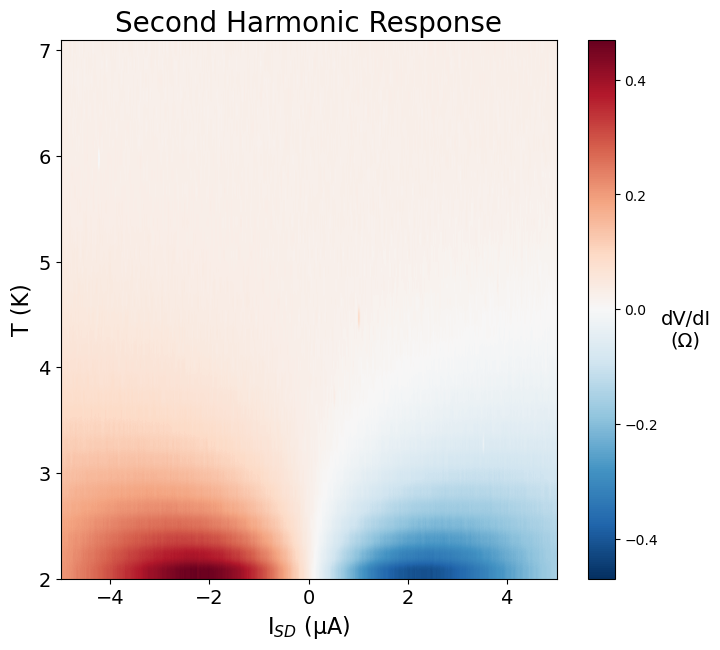

In [652]:
axis_font_options = {'size' : 16}
title_font_options = {'size' : 20}
tick_font_options = {'size' : 14}

fig = plt.figure(figsize=(8,7))

plt.imshow(fwd_array_2f, extent=[currs[0], currs[-1], T_start, T_end],
           aspect='auto', origin='lower', cmap=cm.RdBu_r, norm=matplotlib.colors.CenteredNorm())

plt.ylabel(r'T (K)', fontdict=axis_font_options)
plt.xlabel(r'I$_{SD}$ (μA)', fontdict=axis_font_options)
plt.title('Second Harmonic Response', fontdict=title_font_options)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

cbar = plt.colorbar()
cbar.set_label('dV/dI\n(Ω)', rotation=0, labelpad=20, fontsize=14)
plt.show()

In [653]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS 2f colormap vs T.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

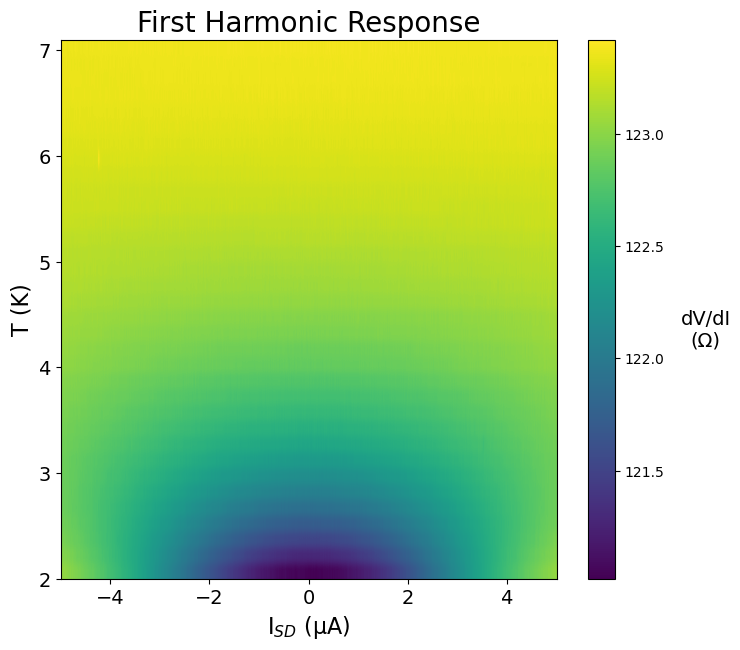

In [659]:
axis_font_options = {'size' : 16}
title_font_options = {'size' : 20}
tick_font_options = {'size' : 14}

fig = plt.figure(figsize=(8,7))

plt.imshow(fwd_array_1f, extent=[currs[0], currs[-1], T_start, T_end],
           aspect='auto', origin='lower', cmap='viridis')

plt.ylabel(r'T (K)', fontdict=axis_font_options)
plt.xlabel(r'I$_{SD}$ (μA)', fontdict=axis_font_options)
plt.title('First Harmonic Response', fontdict=title_font_options)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

cbar = plt.colorbar()
cbar.set_label('dV/dI\n(Ω)', rotation=0, labelpad=30, fontsize=14)
plt.show()

In [660]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS 1f colormap vs T.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False)

In [786]:
T_vals = numpy.arange(T_start, T_end + T_step, T_step)
print(numpy.where(T_vals == 3.5))
T_vals

(array([], dtype=int64),)


array([2.  , 2.15, 2.3 , 2.45, 2.6 , 2.75, 2.9 , 3.05, 3.2 , 3.35, 3.5 ,
       3.65, 3.8 , 3.95, 4.1 , 4.25, 4.4 , 4.55, 4.7 , 4.85, 5.  , 5.15,
       5.3 , 5.45, 5.6 , 5.75, 5.9 , 6.05, 6.2 , 6.35, 6.5 , 6.65, 6.8 ,
       6.95, 7.1 ])

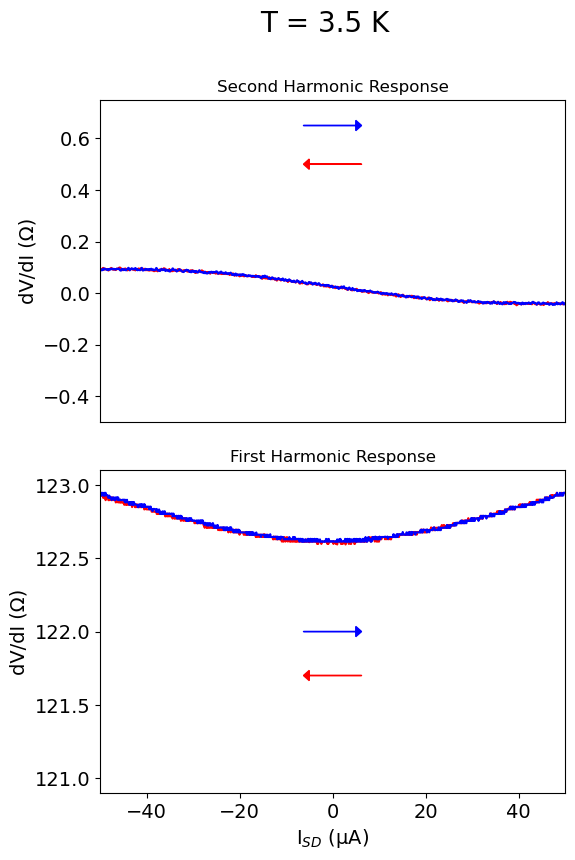

In [812]:
axis_font_options = {'size' : 14}
title_font_options = {'size' : 16}
tick_font_options = {'size' : 14}

ind = 10

fig = plt.figure(figsize=(6,9))
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1])
plt.suptitle(f'T = {T_vals[ind]:.1f} K', fontsize=20)

ax0 = plt.subplot(gs[0])
ax0.plot(currs*10, rev_array_2f[ind,:],
         color='r')
ax0.plot(currs*10, fwd_array_2f[ind,:],
         color='b')

ax0.arrow(-6.25, 0.65, 12.5, 0, color='b', head_width=0.04, head_length=1.25, length_includes_head=True)
ax0.arrow(6.25, 0.5, -12.5, 0, color='r', head_width=0.04, head_length=1.25, length_includes_head=True)

ax0.set_title('Second Harmonic Response')
ax0.set_xlim([-50, 50])
ax0.set_ylim([-0.5, 0.75])
ax0.set_ylabel(r'dV/dI (Ω)', fontdict=axis_font_options)
ax0.tick_params(labelsize=14)

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(currs*10, rev_array_1f[ind],
         color='r')
ax1.plot(currs*10, fwd_array_1f[ind],
         color='b')

ax1.arrow(-6.25, 122, 12.5, 0, color='b', head_width=0.07, head_length=1.25, length_includes_head=True)
ax1.arrow(6.25, 121.7, -12.5, 0, color='r', head_width=0.07, head_length=1.25, length_includes_head=True)

ax1.set_title('First Harmonic Response')
ax1.set_xlim([-50, 50])
ax1.set_ylim([120.9, 123.1])
ax1.set_xlabel(r'I$_{SD}$ (μA)', fontdict=axis_font_options)
ax1.set_ylabel(r'dV/dI (Ω)', fontdict=axis_font_options)
ax1.tick_params(labelsize=14)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax0.get_xticklines(), visible=False)

plt.subplots_adjust(hspace=0.15)

plt.show()

In [813]:
# useful line for saving to relative figures folder
# fig_dir = os.path.dirname(dat.dir) + '/figures'
fig_dir = '/Users/jackbarlow/Dropbox/Jack B/group meeting/aps figures 2023'
fig_name = "APS 1f 2f T=3.5K.png"
fig.savefig(fig_dir + "/" + fig_name, dpi=1200, transparent=False, bbox_inches='tight')